In [20]:
from __future__ import division, print_function, unicode_literals
import csv
import shutil
import os
import time
import requests
import subprocess
from subprocess import call
import numpy as np
import tensorflow as tf


In [21]:
import numpy as np
import gym

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory 

In [22]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [23]:
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# # # MDP 


## Deep Q-Learning


In [24]:
import gym
import gym_foo

In [26]:
env = gym.make('foo-v14')

__init__


In [27]:
env.observation_space.shape

(4, 5)

In [28]:
nb_actions= env.action_space.n
nb_actions

6

In [29]:
env.node

1

In [30]:
# Next, we build a very simple model.
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                336       
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_3 (Activation)    (None, 16)                0         
__________

In [32]:
memory = SequentialMemory(limit=1000, window_length=1)
policy = BoltzmannQPolicy()
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10,
               target_model_update=1e-2, policy=policy)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

In [55]:
%%time
history= dqn.fit(env, nb_steps=100, visualize=True, verbose=2)


Training for 10 steps ...
[[46.93333333 46.93333333  1.          0.5         0.        ]
 [38.54305548 38.54305548  1.          0.5         0.        ]
 [98.         98.          1.          0.5         0.        ]
 [21.4        21.4         1.          0.5         0.        ]]
Delete Node with attempt:  113
reward:  0 0.0 1.0
WARN: View is not allowed in this environment
[[4.69333333e+01 4.69333333e+01 1.00000000e+00 5.00000000e-01
  0.00000000e+00]
 [3.85430555e+01 3.85430555e+01 1.00000000e+00 5.00000000e-01
  0.00000000e+00]
 [9.80000000e+01 9.80000000e+01 1.00000000e+00 5.00000000e-01
  0.00000000e+00]
 [4.65920000e+03 4.65920000e+03 1.00000000e+00 5.00000000e-01
  0.00000000e+00]]
Delete Node with attempt:  114
reward:  0 0.0 1.0
WARN: View is not allowed in this environment
[[4.69333333e+01 4.69333333e+01 1.00000000e+00 5.00000000e-01
  0.00000000e+00]
 [3.85430555e+01 3.85430555e+01 1.00000000e+00 5.00000000e-01
  0.00000000e+00]
 [9.80000000e+01 9.80000000e+01 1.00000000e+00 5

In [57]:
env.node

1

In [56]:
env.step(4)

[[  0.           0.           0.           0.           0.        ]
 [ 42.06458299  42.06458299   1.           0.5          0.        ]
 [-40.         -40.           1.           0.5          0.        ]
 [ 41.06940463  41.06940463   1.           0.5          0.        ]]
Delete Node S4
/Users/baz/ieee-demo/deleteNode.sh
0
reward:  0.5 0.0 1.0


(array([[  0.        ,   0.        ,   0.        ,   0.        ,
           0.        ],
        [ 42.06458299,  42.06458299,   1.        ,   0.5       ,
           0.        ],
        [-40.        , -40.        ,   1.        ,   0.5       ,
           0.        ],
        [  0.        ,   0.        ,   1.        ,   0.5       ,
           0.        ]]), 1.0, True, {})

In [56]:
# Okay, now it's time to learn something! We visualize the training here for show, but this
# slows down training quite a lot. You can always safely abort the training prematurely using
# Ctrl + C.
ENV_NAME="micro4"
dqn.fit(env, nb_steps=10, visualize=True, verbose=2)

# After training is done, we save the final weights.
dqn.save_weights('dqn_{}_weights.h5f'.format(ENV_NAME), overwrite=True)



Training for 10 steps ...
[[51.32271607 51.32271607  1.          0.5         0.        ]
 [37.8055518  37.8055518   1.          0.5         0.        ]
 [98.         98.          1.          0.5         0.        ]
 [17.54854207 17.54854207  1.          0.5         0.        ]]
Delete Node with attempt:  123
reward:  0 0.0 1.0
WARN: View is not allowed in this environment
[[51.32271607 51.32271607  1.          0.5         0.        ]
 [37.8055518  37.8055518   1.          0.5         0.        ]
 [98.         98.          1.          0.5         0.        ]
 [17.54854207 17.54854207  1.          0.5         0.        ]]
Delete Node with attempt:  124
reward:  0 0.0 1.0
WARN: View is not allowed in this environment
[[51.32271607 51.32271607  1.          0.5         0.        ]
 [37.8055518  37.8055518   1.          0.5         0.        ]
 [98.         98.          1.          0.5         0.        ]
 [61.99586694 61.99586694  1.          0.5         0.        ]]
Delete Node with attemp

[[82.9424307  82.9424307   1.          0.5         0.        ]
 [38.10467435 38.10467435  1.          0.5         0.        ]
 [98.         98.          1.          0.5         0.        ]
 [43.90991471 43.90991471  1.          0.5         0.        ]]
Delete Node with attempt:  145
reward:  0 0.0 1.0
WARN: View is not allowed in this environment
[[82.9424307  82.9424307   1.          0.5         0.        ]
 [38.10467435 38.10467435  1.          0.5         0.        ]
 [98.         98.          1.          0.5         0.        ]
 [ 0.          0.          0.          0.          0.        ]]
Delete Node with attempt:  146
reward:  0 0.0 1.0
WARN: View is not allowed in this environment
[[82.9424307  82.9424307   1.          0.5         0.        ]
 [38.10467435 38.10467435  1.          0.5         0.        ]
 [98.         98.          1.          0.5         0.        ]
 [61.57126674 61.57126674  1.          0.5         0.        ]]
Delete Node with attempt:  147
reward:  0 0.0 1.0

[[79.20415917 79.20415917  1.          0.5         0.        ]
 [38.33980894 38.33980894  1.          0.5         0.        ]
 [98.         98.          1.          0.5         0.        ]
 [ 0.          0.          1.          0.5         0.        ]]
Delete Node with attempt:  167
reward:  0 0.0 1.0
WARN: View is not allowed in this environment
[[7.92041592e+01 7.92041592e+01 1.00000000e+00 5.00000000e-01
  0.00000000e+00]
 [3.83398089e+01 3.83398089e+01 1.00000000e+00 5.00000000e-01
  0.00000000e+00]
 [9.80000000e+01 9.80000000e+01 1.00000000e+00 5.00000000e-01
  0.00000000e+00]
 [5.46994135e+03 5.46994135e+03 1.00000000e+00 5.00000000e-01
  0.00000000e+00]]
Delete Node with attempt:  168
reward:  0 0.0 1.0
WARN: View is not allowed in this environment
[[8.64387578e+01 8.64387578e+01 1.00000000e+00 5.00000000e-01
  0.00000000e+00]
 [3.83513035e+01 3.83513035e+01 1.00000000e+00 5.00000000e-01
  0.00000000e+00]
 [9.80000000e+01 9.80000000e+01 1.00000000e+00 5.00000000e-01
  0.00000000

Delete Node with attempt:  188
reward:  0 0.0 1.0
WARN: View is not allowed in this environment
[[7.85114606e+01 7.85114606e+01 1.00000000e+00 5.00000000e-01
  0.00000000e+00]
 [3.84765249e+01 3.84765249e+01 1.00000000e+00 5.00000000e-01
  0.00000000e+00]
 [9.80000000e+01 9.80000000e+01 1.00000000e+00 5.00000000e-01
  0.00000000e+00]
 [4.15520000e+03 4.15520000e+03 1.00000000e+00 5.00000000e-01
  0.00000000e+00]]
Delete Node with attempt:  189
reward:  0 0.0 1.0
WARN: View is not allowed in this environment
[[74.7730913  74.7730913   1.          0.5         0.        ]
 [38.47652494 38.47652494  1.          0.5         0.        ]
 [98.         98.          1.          0.5         0.        ]
 [ 0.          0.          1.          0.5         0.        ]]
Delete Node with attempt:  190
reward:  0 0.0 1.0
WARN: View is not allowed in this environment
[[74.7730913  74.7730913   1.          0.5         0.        ]
 [38.84032407 38.84032407  1.          0.5         0.        ]
 [98.       

{'previous_replicas': '10', 'result': 'Service converged', 'Replicas': '11'}
0.5
WARN: View is not allowed in this environment
Episode 2: reward: 1.500, steps: 72
[[19.8440208  19.8440208   1.          0.5         0.        ]
 [38.60953304 38.60953304  1.          0.5         0.        ]
 [98.         98.          1.          0.5         0.        ]
 [ 0.          0.          1.          0.5         0.        ]]
Delete Node with attempt:  211
reward:  0 0.0 1.0
WARN: View is not allowed in this environment
[[19.8440208  19.8440208   1.          0.5         0.        ]
 [38.60953304 38.60953304  1.          0.5         0.        ]
 [98.         98.          1.          0.5         0.        ]
 [68.3954403  68.3954403   1.          0.5         0.        ]]
Delete Node with attempt:  212
reward:  0 0.0 1.0
WARN: View is not allowed in this environment
[[19.8440208  19.8440208   1.          0.5         0.        ]
 [38.60953304 38.60953304  1.          0.5         0.        ]
 [98.        

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [90]:
from rl.callbacks import FileLogger, ModelIntervalCheckpoint


In [91]:
# Finally, evaluate our algorithm for 5 episodes.
ENV_NAME="micro4"
weights_filename = 'mydqn_{}_weights.h5f'.format(ENV_NAME)
checkpoint_weights_filename = 'dqn_' + ENV_NAME + '_weights_{step}.h5f'
log_filename = 'mydqn_{}_log.json'.format(ENV_NAME)
callbacks = [ModelIntervalCheckpoint(checkpoint_weights_filename, interval=250000)]
callbacks += [FileLogger(log_filename, interval=100)]
dqn.fit(env, callbacks=callbacks, nb_steps=175, log_interval=10000)

#history =dqn.test(env, nb_episodes=5, visualize=True)

Training for 175 steps ...
Interval 1 (0 steps performed)
[[32.39727855 32.39727855  1.          0.5         0.        ]
 [46.62556181 46.62556181  1.          0.5         0.        ]
 [98.         98.          1.          0.5         0.        ]
 [31.06666667 31.06666667  1.          0.5         0.        ]]
Delete Node with attempt:  368
reward:  0 0.0 1.0
    1/10000 [..............................] - ETA: 6:33:41 - reward: 0.0000e+00[[45.6630442  45.6630442   1.          0.5         0.        ]
 [47.08078745 47.08078745  1.          0.5         0.        ]
 [98.         98.          1.          0.5         0.        ]
 [45.6        45.6         1.          0.5         0.        ]]
Delete Node with attempt:  369
reward:  0 0.0 1.0
    2/10000 [..............................] - ETA: 6:58:58 - reward: 0.0000e+00[[45.6630442  45.6630442   1.          0.5         0.        ]
 [47.08078745 47.08078745  1.          0.5         0.        ]
 [98.         98.          1.          0.5        

Delete Node with attempt:  388
reward:  0 0.0 1.0
   21/10000 [..............................] - ETA: 10:41:09 - reward: 0.0476[[72.46666667 72.46666667  1.          0.5         0.        ]
 [47.12379923 47.12379923  1.          0.5         0.        ]
 [98.         98.          1.          0.5         0.        ]
 [ 0.          0.          1.          0.5         0.        ]]
Delete Node with attempt:  389
reward:  0 0.0 1.0
   22/10000 [..............................] - ETA: 10:33:14 - reward: 0.0455[[72.46666667 72.46666667  1.          0.5         0.        ]
 [47.12379923 47.12379923  1.          0.5         0.        ]
 [98.         98.          1.          0.5         0.        ]
 [ 0.          0.          1.          0.5         0.        ]]
Delete Node with attempt:  390
reward:  0 0.0 1.0
   23/10000 [..............................] - ETA: 10:21:43 - reward: 0.0435[[7.24666667e+01 7.24666667e+01 1.00000000e+00 5.00000000e-01
  0.00000000e+00]
 [4.71237992e+01 4.71237992e+01 1

   42/10000 [..............................] - ETA: 8:34:15 - reward: 0.0238[[74.16838877 74.16838877  1.          0.5         0.        ]
 [48.9423711  48.9423711   1.          0.5         0.        ]
 [98.         98.          1.          0.5         0.        ]
 [ 0.          0.          0.          0.          0.        ]]
Delete Node with attempt:  410
reward:  0 0.0 1.0
   43/10000 [..............................] - ETA: 8:30:35 - reward: 0.0233[[7.41683888e+01 7.41683888e+01 1.00000000e+00 5.00000000e-01
  0.00000000e+00]
 [4.89423711e+01 4.89423711e+01 1.00000000e+00 5.00000000e-01
  0.00000000e+00]
 [9.80000000e+01 9.80000000e+01 1.00000000e+00 5.00000000e-01
  0.00000000e+00]
 [1.01162822e+04 1.01162822e+04 1.00000000e+00 5.00000000e-01
  0.00000000e+00]]
Delete Node with attempt:  411
reward:  0 0.0 1.0
   44/10000 [..............................] - ETA: 8:27:03 - reward: 0.0227[[7.41683888e+01 7.41683888e+01 1.00000000e+00 5.00000000e-01
  0.00000000e+00]
 [4.89423711e+01 4

Delete Node with attempt:  430
reward:  0 0.0 1.0
   63/10000 [..............................] - ETA: 7:58:18 - reward: 0.0556[[74.10172655 74.10172655  1.          0.5         0.        ]
 [47.34023535 47.34023535  1.          0.5         0.        ]
 [98.         98.          1.          0.5         0.        ]
 [ 0.          0.          1.          0.5         0.        ]]
Delete Node with attempt:  431
reward:  0 0.0 1.0
   64/10000 [..............................] - ETA: 7:56:21 - reward: 0.0547[[74.10172655 74.10172655  1.          0.5         0.        ]
 [47.34976998 47.34976998  1.          0.5         0.        ]
 [98.         98.          1.          0.5         0.        ]
 [ 0.          0.          1.          0.5         0.        ]]
Scale Service UP S2
{'previous_replicas': '10', 'result': 'No Adaptation', 'Replicas': '10'}
0.5
   65/10000 [..............................] - ETA: 7:54:22 - reward: 0.0615[[74.10172655 74.10172655  1.          0.5         0.        ]
 [47.3

   84/10000 [..............................] - ETA: 7:31:57 - reward: 0.0536[[73.10179321 73.10179321  1.          0.5         0.        ]
 [47.41057973 47.41057973  1.          0.5         0.        ]
 [98.         98.          1.          0.5         0.        ]
 [ 0.          0.          1.          0.5         0.        ]]
Delete Node with attempt:  452
reward:  0 0.0 1.0
   85/10000 [..............................] - ETA: 7:30:50 - reward: 0.0529[[73.10179321 73.10179321  1.          0.5         0.        ]
 [47.41057973 47.41057973  1.          0.5         0.        ]
 [98.         98.          1.          0.5         0.        ]
 [26.66666667 26.66666667  1.          0.5         0.        ]]
Delete Node with attempt:  453
reward:  0 0.0 1.0
   86/10000 [..............................] - ETA: 7:30:35 - reward: 0.0523[[73.10179321 73.10179321  1.          0.5         0.        ]
 [47.41057973 47.41057973  1.          0.5         0.        ]
 [98.         98.          1.          0

ReadTimeout: HTTPConnectionPool(host='192.168.99.100', port=8888): Read timed out. (read timeout=5)

In [92]:
import argparse
import json

import matplotlib.pyplot as plt


def visualize_log(filename, figsize=None, output=None):
    with open(filename, 'r') as f:
        data = json.load(f)
    if 'episode' not in data:
        raise ValueError('Log file "{}" does not contain the "episode" key.'.format(filename))
    episodes = data['episode']

    # Get value keys. The x axis is shared and is the number of episodes.
    keys = sorted(list(set(data.keys()).difference(set(['episode']))))

    if figsize is None:
        figsize = (15., 5. * len(keys))
    f, axarr = plt.subplots(len(keys), sharex=True, figsize=figsize)
    for idx, key in enumerate(keys):
        axarr[idx].plot(episodes, data[key])
        axarr[idx].set_ylabel(key)
    plt.xlabel('episodes')
    plt.tight_layout()
    if output is None:
        plt.show()
    else:
        plt.savefig(output)



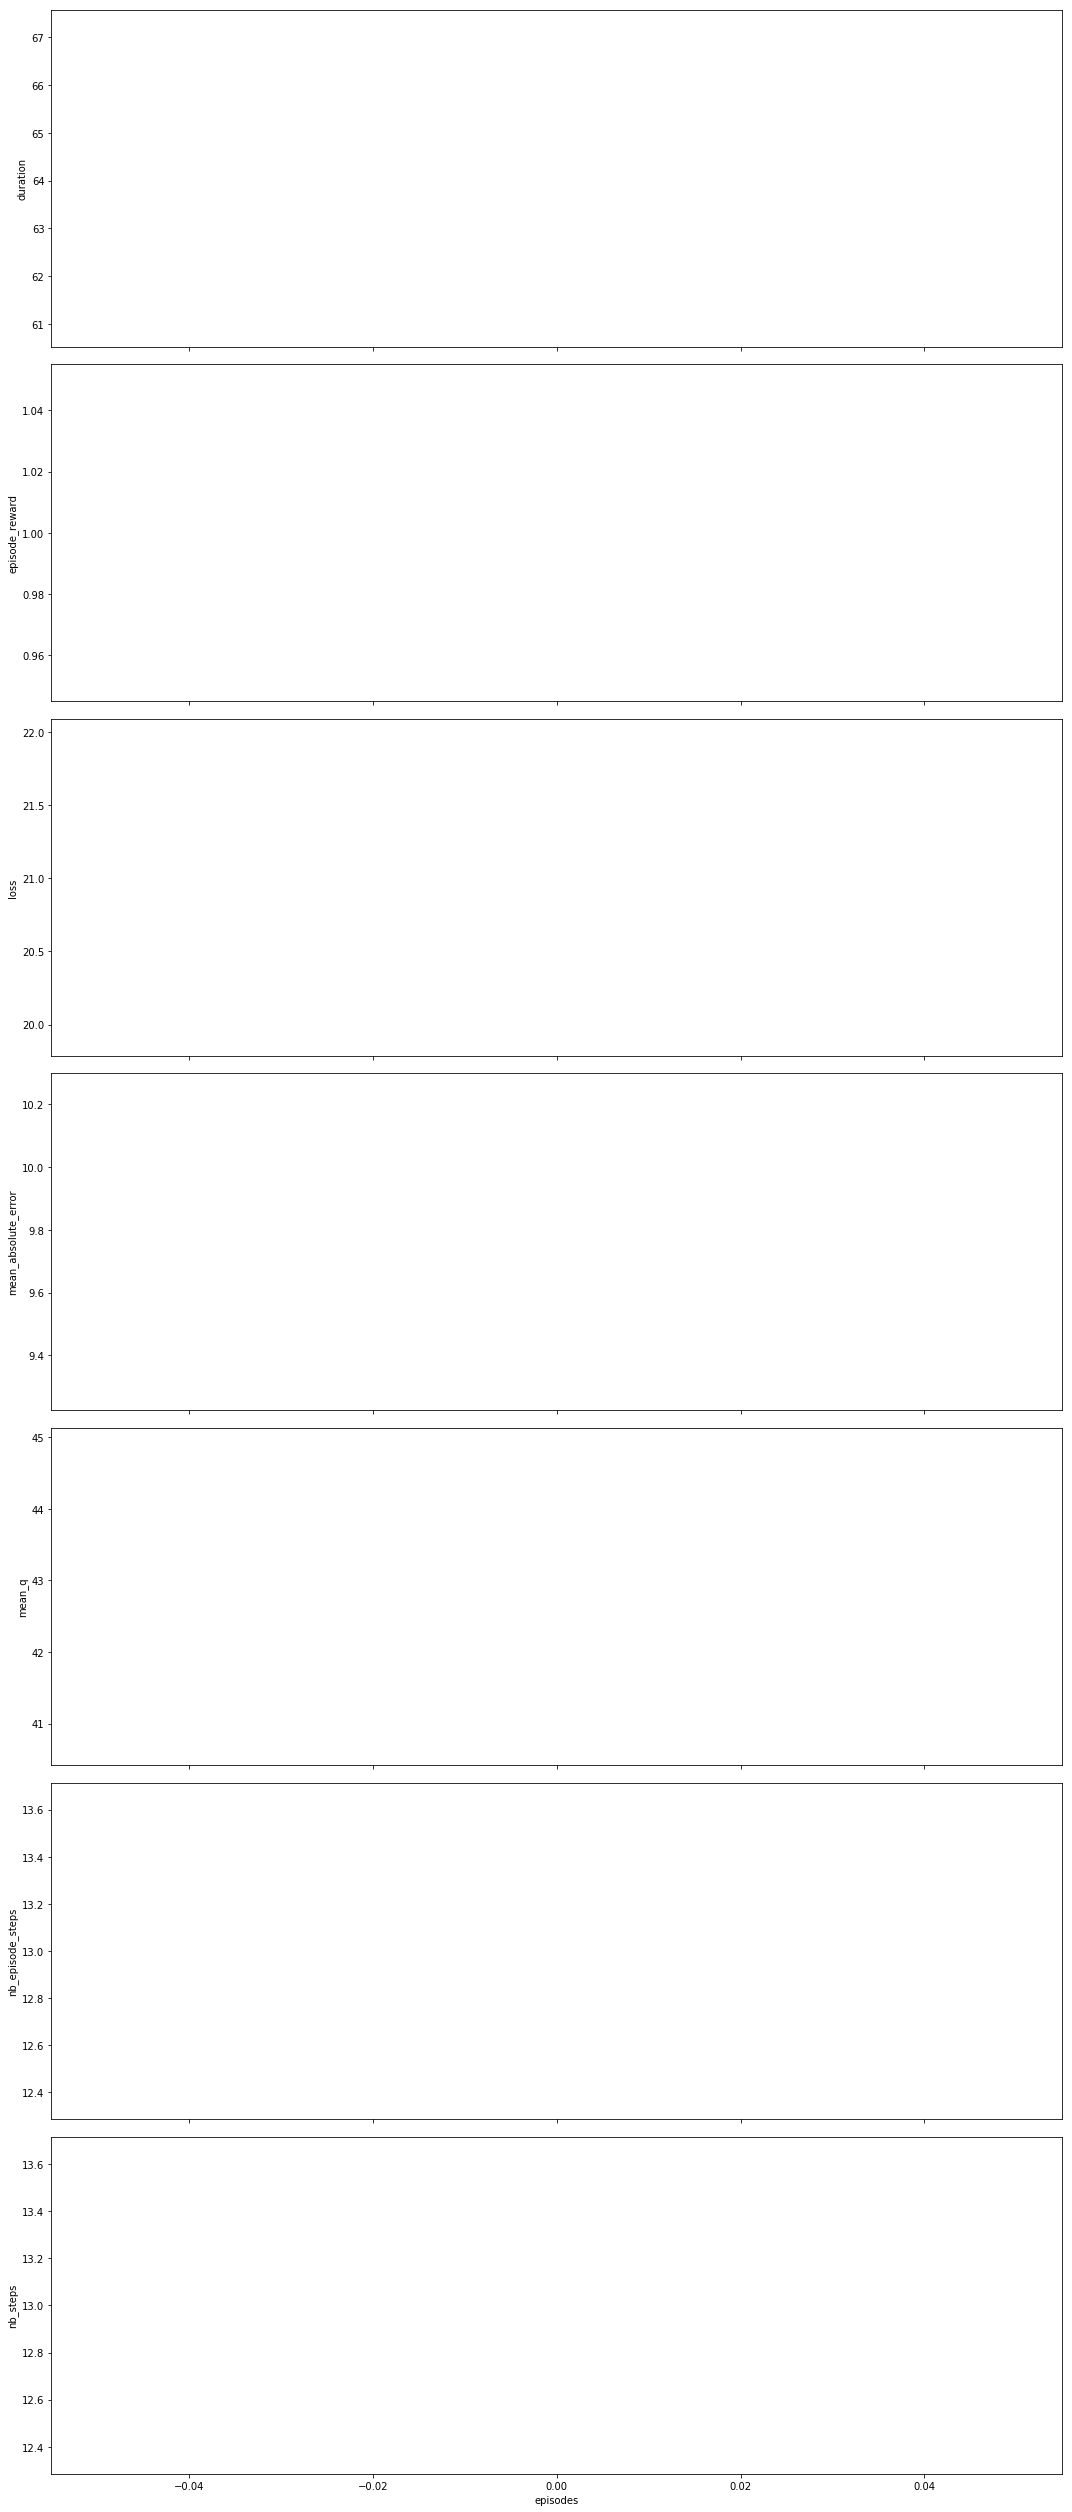

In [93]:
#visualize_log(args.filename, output=args.output, figsize=args.figsize)
visualize_log('mydqn_micro4_log.json')


In [34]:
ENV_NAME="micro4"
hist = dqn.load_weights('dqn_micro2_weights.h5f')

In [39]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')

In [ ]:
def moving_average_diff(a, n=9):
    diff = np.diff(a)
    ret = np.cumsum(diff, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

plt.plot(moving_average_diff(history))
plt.ylabel('Average of victories per game')
plt.show()

In [ ]:
moving_average_diff(history)